In [51]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html

In [19]:
warnings.filterwarnings("ignore")
users = pd.read_json('renttherunway_final_data.json', lines=True)
#data = data.iloc[:10000, :]
users = users.dropna()

In [20]:
# 1. Count the frequency of each user_id
user_counts = users['user_id'].value_counts()

In [21]:
# 2. Filter the dataset to only include user_id's with count >= 5
frequent_users = user_counts[user_counts >= 10].index
users = users[users['user_id'].isin(frequent_users)]
users = users.reset_index(drop=True)
# Display the filtered dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20270 entries, 0 to 20269
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fit             20270 non-null  object 
 1   user_id         20270 non-null  int64  
 2   bust size       20270 non-null  object 
 3   item_id         20270 non-null  int64  
 4   weight          20270 non-null  object 
 5   rating          20270 non-null  float64
 6   rented for      20270 non-null  object 
 7   review_text     20270 non-null  object 
 8   body type       20270 non-null  object 
 9   review_summary  20270 non-null  object 
 10  category        20270 non-null  object 
 11  height          20270 non-null  object 
 12  size            20270 non-null  int64  
 13  age             20270 non-null  float64
 14  review_date     20270 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 2.3+ MB


(array([[<Axes: title={'center': 'user_id'}>,
         <Axes: title={'center': 'item_id'}>],
        [<Axes: title={'center': 'rating'}>,
         <Axes: title={'center': 'size'}>],
        [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object),)

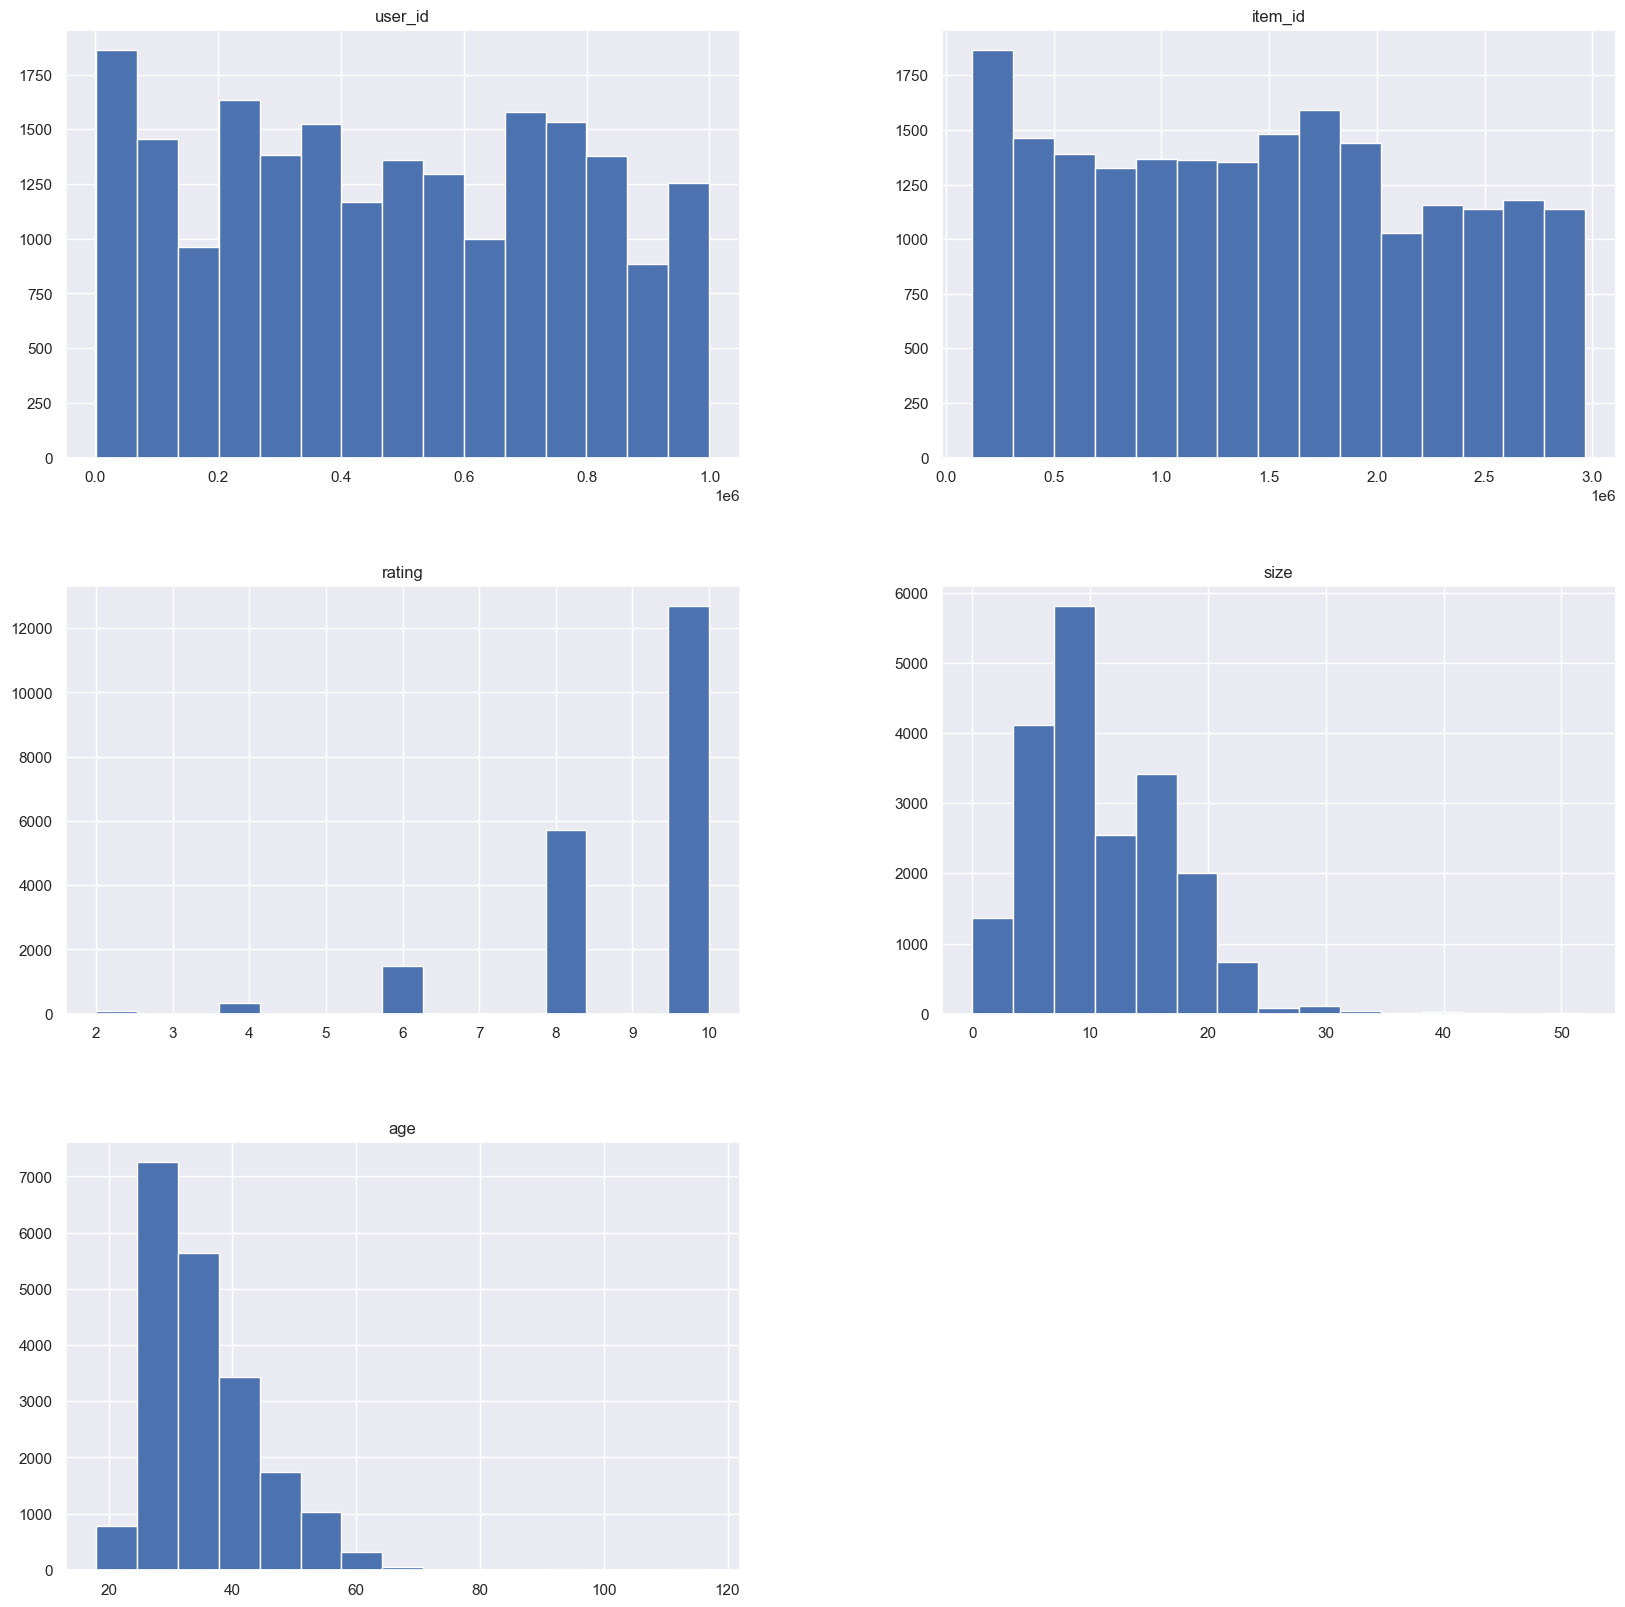

In [37]:
sns.set_theme(style = 'darkgrid')
users.hist(bins=15, figsize=(20, 20), grid=True, legend=None),

Outliers: Age

In [42]:
min_age = users['age'].min()
max_age = users['age'].max()
print(min_age,max_age)

18.0 117.0


In [46]:
users = users[~users['age'].isin([116, 117])]

In [78]:
categories = users.groupby(by="category")['rating'].mean().reset_index()
age = users.groupby(by='category')['age'].mean().reset_index()
size = users.groupby(by='category')['size'].mean().reset_index()

In [116]:
merged_data = pd.merge(categories, age, on='category')
merged_data = pd.merge(merged_data, size, on='category')
merged_data

category     rating        age       size
0       blazer   9.055556  35.616667   9.522222
1       blouse   8.872928  36.535912  10.756906
2      blouson  10.000000  37.000000   8.333333
3       bomber   9.437500  35.500000  10.281250
4   buttondown   8.000000  33.000000  14.000000
..         ...        ...        ...        ...
59     trouser   9.375000  38.937500  12.875000
60    trousers   9.200000  32.000000  12.800000
61       tunic   8.695652  36.021739   9.413043
62  turtleneck   8.750000  34.000000  12.500000
63        vest   9.061728  35.135802  10.197531

[64 rows x 4 columns]

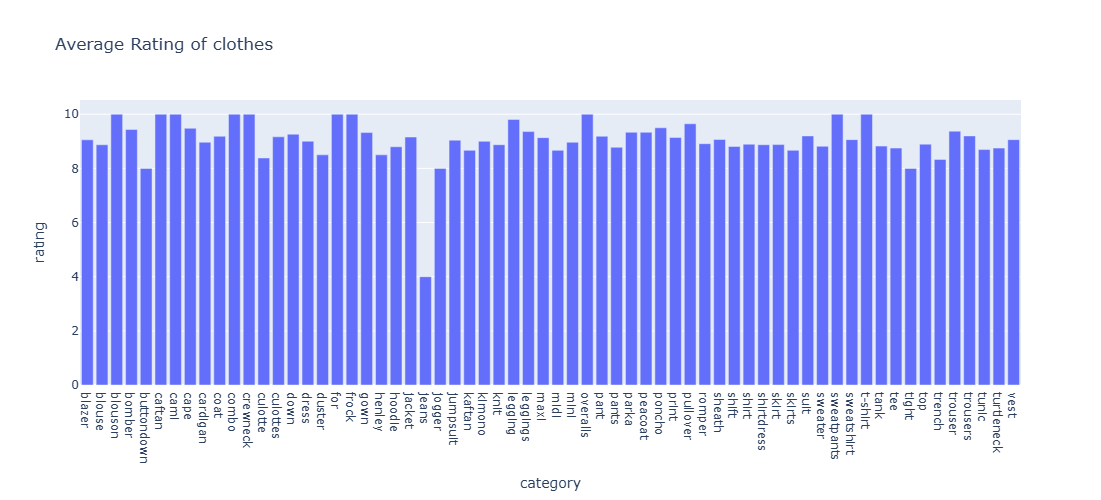

In [100]:
chart3 = px.bar(data_frame=merged_data,
               x="category",
               y=merged_data.columns[1],
               height=500,
               title="Average Rating of clothes",
               )
chart3

In [117]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Inicialización de Dash
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H2("Interactive Bar Chart Dashboard"),
    dcc.Dropdown(
        id="dropdown_bar_chart",
        options=[
            {"label": "Rating", "value": "rating"},
            {"label": "Age", "value": "age"},
            {"label": "Size", "value": "size"}
        ],
        value="rating",  # Valor por defecto
        clearable=False
    ),
    dcc.Graph(id="graph3")
])

# Callback para actualizar el gráfico
@app.callback(
    Output("graph3", "figure"),
    [Input("dropdown_bar_chart", "value")]
)
def update_bar(selected_column):
    chart = px.bar(
        data_frame=merged_data,
        x="category",
        y=selected_column,
        title=f"Average {selected_column.capitalize()} by Category",
        height=500
    )
    return chart

# Ejecutar el servidor
if __name__ == "__main__":
    app.run_server(debug=True)


In [101]:
graph3 = dcc.Graph(
        id='graph3',
        figure=chart3,
        #className="five columns"
    )

In [108]:
dropdown_bar_chart = dcc.Dropdown(
        id="dropdown_bar_chart",
        options=[{"value":label, "label":label} for label in merged_data.columns[1]],
        value=merged_data.columns[1],
        clearable = False
    )

In [109]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__,
                external_stylesheets=external_stylesheets,
                meta_tags=[{"name": "viewport", "content": "width=device-width"}]
               )

In [110]:
header = html.H2(children="Simple Dashboard With Widgets")

In [111]:
bar_div = html.Div(children=[dropdown_bar_chart, graph3], className="six columns")
row2 = html.Div(children=[bar_div], className="eight columns")
layout = html.Div(children=[header, row2], style={"text-align": "center", "justifyContent":"center"})
app.layout = layout

In [112]:
from dash.dependencies import Input, Output
@app.callback(Output('graph3', 'figure'), [Input('dropdown_bar_chart', 'value')])
def update_bar(bar_drop):
    chart3 = px.bar(data_frame=merged_data,
               x="Category",
               y=bar_drop,
               title="Avg %s Per Flower Type"%bar_drop,
               height=500,
               )
    return chart3

In [113]:
if __name__ == "__main__":
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[112], line 4, in update_bar(bar_drop='rating')
      2 @app.callback(Output('graph3', 'figure'), [Input('dropdown_bar_chart', 'value')])
      3 def update_bar(bar_drop):
----> 4     chart3 = px.bar(data_frame=merged_data,
        chart3 = Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'category=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['blazer', 'blouse', 'blouson', 'bomber', 'buttondown', 'caftan', 'cami',
                          'cape', 'cardigan', 'coat', 'combo', 'crewneck',

In [12]:
from sklearn.datasets import load_iris, load_wine

In [13]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["FlowerType"] = [iris.target_names[target] for target in iris.target]

iris_df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  FlowerType  
0     setosa  
1     setosa  
2     setosa  
3     setosa  
4     setosa

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']